# Sentiment analysis 

Here we will test the twitter and the BERT sentiment analysis models

### Imports

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Add the project root directory (not src) to sys.path
sys.path.append(os.path.abspath("../data/"))

# Now import the DataLoader class
from data_loading import DataLoader

raw = '../../data/RAW/'
clean = '../../data/CLEAN'

In [3]:
# Add the directory containing the script to sys.path
sys.path.append(os.path.abspath("../model"))

# Now you can import the script like a module
import DistillBERT_emotion

/Users/djay/miniforge3/envs/ada/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the data
- load the data
- add multiple indexing
- first processing to have unique index

In [4]:
#load raw data
data_loader = DataLoader(raw,clean)
MovieData = data_loader.clean_movie_data()

In [5]:
MovieData

,Movie name,Release date,Box office revenue,Languages,Countries,Genres,Plot
Wikipedia movie ID,,,,,,,
975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...","set in the second half of the 22nd century, th..."
6631279,Little city,1997-04-04,NaN,English Language,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...","adam, a san francisco-based artist who works a..."
77856,Mary Poppins,1964-08-27,102272727.0,English Language,United States of America,"Children's/Family, Musical, Fantasy, Comedy, D...",the film opens with mary poppins perched in a...
21926710,White on Rice,2009-05-31,NaN,NaN,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",jimmy ([[hiroshi watanabe loves dinosaurs and...
156558,Baby Boy,2001-06-27,29381649.0,English Language,United States of America,"Crime Fiction, Drama, Coming of age",a young 20-year-old named jody lives with his...
...,...,...,...,...,...,...,...
25011340,Dot.Kill,2005-03-08,NaN,NaN,United States of America,"Thriller, Crime Thriller, Action, Psychologica...","charlie daines , is a morphine-addicted detect..."
7761830,Spaced Invaders,1990-04-27,15369573.0,English Language,United States of America,"Alien Film, Science Fiction, Family Film, Come...","the space armada from mars, known as the imper..."
1918494,State and Main,2000-08-26,6944471.0,"Italian Language, English Language","France, United States of America","Parody, Americana, Comedy",havoc is wrought on the inhabitants of a small...


In [6]:
twitter_data = [] 
for index in CMU_plot_summary.index[0:Sample_size]:
    if index in CMU_movie_metadata.index:
        ID = CMU_movie_metadata.loc[index]["Movie name"]
        Scores = twitter_emotion.extract_emotion(CMU_plot_summary.loc[index]["Plot"])

        twitter_data.append({
            "ID": ID,
            "joy": Scores[0],
            "optimisn": Scores[1],
            "anger": Scores[2],
            "sadness": Scores[3]
        })

Sentiment_twitter = pd.DataFrame(twitter_data)

Sentiment_twitter

NameError: name 'CMU_plot_summary' is not defined

## distillBERT sentiment analysis

In [7]:

# Lists to accumulate rows for efficiency
sentiment_data = []

detector = DistillBERT_emotion.ViolenceDetector()
i = 0
for index,row in MovieData.iterrows():
    if i%1000 ==0:
        print(i)
    result = detector.analyze_violence(row["Plot"])

    sentiment_data.append({
            "id": index,
            "name" : row["Movie name"],
            "sadness": result[0],
            "joy": result[1],
            "love": result[2],
            "anger": result[3],
            "fear": result[4],
            "surprise": result[5]
        })
    i += 1

Sentiment = pd.DataFrame(sentiment_data)
Sentiment.set_index('id', inplace=True)

Sentiment

Token indices sequence length is longer than the specified maximum sequence length for this model (1891 > 512). Running this sequence through the model will result in indexing errors


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


,name,sadness,joy,love,anger,fear,surprise
id,,,,,,,
975900,Ghosts of Mars,0.166889,0.007635,0.003000,0.104745,0.714015,0.003717
6631279,Little city,0.998778,0.000179,0.000163,0.000604,0.000173,0.000103
77856,Mary Poppins,0.019706,0.323026,0.174988,0.456798,0.023313,0.002169
21926710,White on Rice,0.002686,0.973673,0.001442,0.018248,0.003304,0.000647
156558,Baby Boy,0.382242,0.013167,0.001626,0.588319,0.014060,0.000586
...,...,...,...,...,...,...,...
25011340,Dot.Kill,0.110270,0.397237,0.003831,0.451811,0.034130,0.002721
7761830,Spaced Invaders,0.042246,0.051721,0.002216,0.813385,0.087134,0.003298
1918494,State and Main,0.783821,0.038776,0.001920,0.146256,0.027600,0.001627


In [8]:
# save the result
Sentiment.to_csv(clean + "/sentiment.csv") 

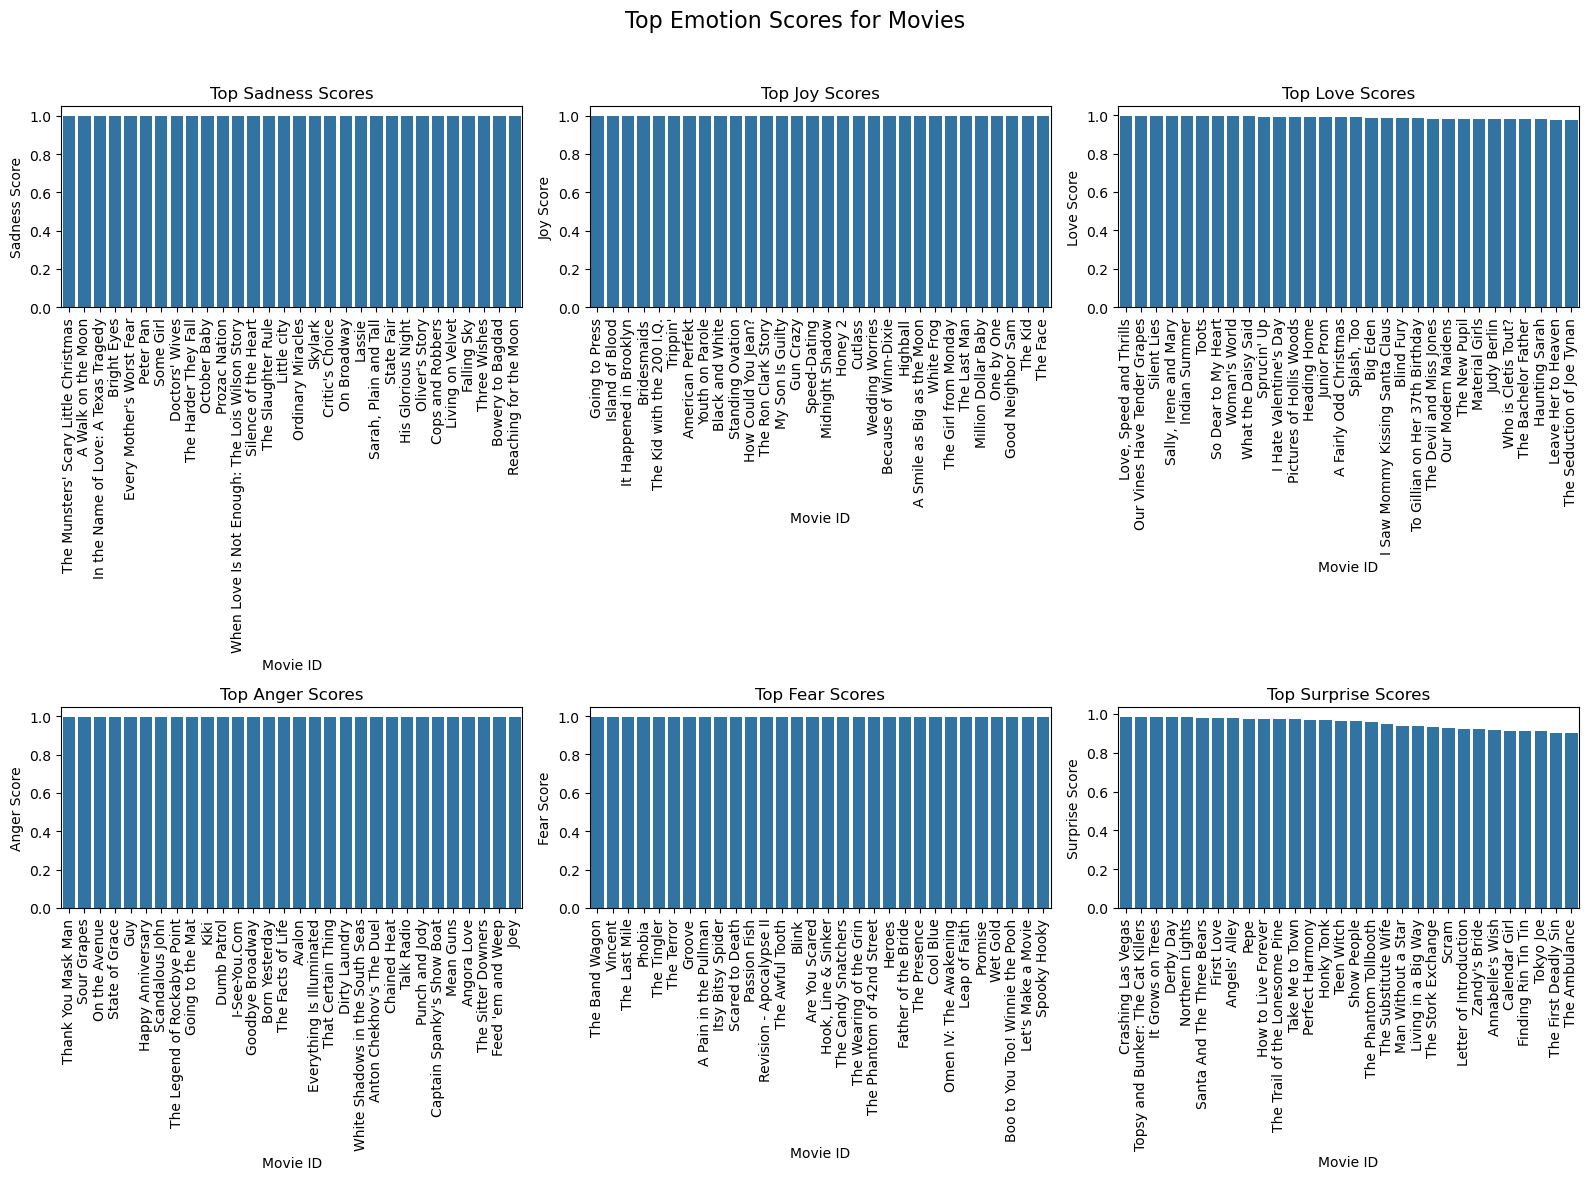

In [9]:
X = 30
emotions = ["sadness",
            "joy",
            "love",
            "anger",
            "fear",
            "surprise"]

# Create a figure with subplots (1x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(16,12))

# Set a title for the entire figure
fig.suptitle('Top Emotion Scores for Movies', fontsize=16)

for i in range(0,len(emotions)):
    
    # Plot for Sadness with vertical x labels
    sns.barplot(x='name', y=emotions[i], data=Sentiment.sort_values(emotions[i],ascending=False).iloc[0:X],ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Top {emotions[i].capitalize()} Scores')
    axes[i//3, i%3].set_xlabel('Movie ID')
    axes[i//3, i%3].set_ylabel(f'{emotions[i].capitalize()} Score')

    axes[i//3, i%3].set_xticks(range(X))  # Ensure ticks are set
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=90)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()
